In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"parikshitkumar","key":"9efa19f4761cf137192f02e398d2eabc"}'}

In [ ]:
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle datasets download -d mornville/pokemonimagedataset

 99% 345M/350M [00:03<00:00, 104MB/s]
100% 350M/350M [00:03<00:00, 98.5MB/s]


In [ ]:
! unzip pokemonimagedataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/Snorlax/Snorlax.125.png  
  inflating: dataset/train/Snorlax/Snorlax.126.png  
  inflating: dataset/train/Snorlax/Snorlax.127.jpg  
  inflating: dataset/train/Snorlax/Snorlax.128.jpg  
  inflating: dataset/train/Snorlax/Snorlax.13.jpg  
  inflating: dataset/train/Snorlax/Snorlax.130.png  
  inflating: dataset/train/Snorlax/Snorlax.132.png  
  inflating: dataset/train/Snorlax/Snorlax.133.jpg  
  inflating: dataset/train/Snorlax/Snorlax.134.JPG  
  inflating: dataset/train/Snorlax/Snorlax.135.png  
  inflating: dataset/train/Snorlax/Snorlax.137.png  
  inflating: dataset/train/Snorlax/Snorlax.138.jpg  
  inflating: dataset/train/Snorlax/Snorlax.139.jpg  
  inflating: dataset/train/Snorlax/Snorlax.14.jpg  
  inflating: dataset/train/Snorlax/Snorlax.140.jpg  
  inflating: dataset/train/Snorlax/Snorlax.141.jpg  
  inflating: dataset/train/Snorlax/Snorlax.142.jpg  
  inflating: dataset/train/Snorlax/Snorlax.143.jpg

In [ ]:
from fastai.vision import *
from fastai.metrics import accuracy

In [ ]:
path = "/content/dataset/train"

In [ ]:
data = ImageDataBunch.from_folder(path,
                                 ds_tfms = get_transforms(do_flip=False, flip_vert=False),
                                 valid_pct=0.2,
                                 size=224,
                                 bs=16)

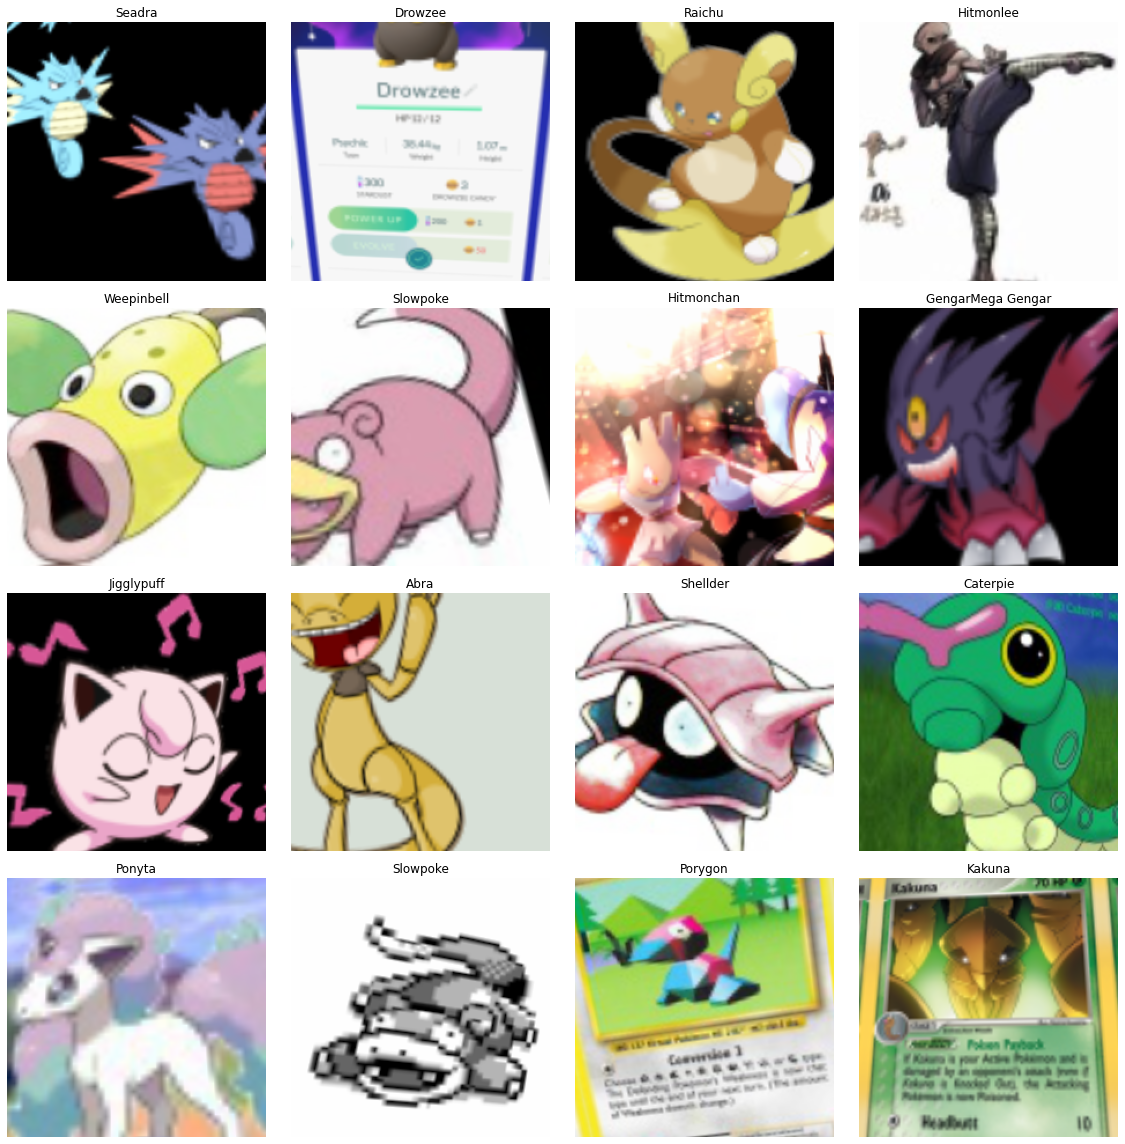

In [ ]:
data.show_batch(row=3)


In [ ]:
print(data.classes)

['Abra', 'Aerodactyl', 'AerodactylMega Aerodactyl', 'Alakazam', 'AlakazamMega Alakazam', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'BeedrillMega Beedrill', 'Bellsprout', 'Blastoise', 'BlastoiseMega Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'CharizardMega Charizard X', 'CharizardMega Charizard Y', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'GengarMega Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'GyaradosMega Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'KangaskhanMega Kangaskhan', 'Kingler', 'Koffi

In [ ]:
learn = cnn_learner(data, models.densenet201, metrics = accuracy)


Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine

In [ ]:
learn.fit_one_cycle(2)


epoch,train_loss,valid_loss,accuracy,time
0,2.385374,1.622051,0.601108,07:23
1,1.691592,1.237509,0.689335,07:21


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.531687,1.206733,0.693829,07:29
1,1.720474,1.269861,0.683194,07:32
2,1.690554,1.239591,0.691132,07:31
3,1.519365,1.186216,0.700719,07:34
4,1.433412,1.132236,0.708658,07:38
5,1.225260,1.066760,0.729329,07:36
6,1.049470,1.028662,0.737268,07:38
7,0.924886,1.000872,0.744158,07:33
8,0.891282,0.993779,0.745057,07:39
9,0.832261,0.990269,0.747154,07:36


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

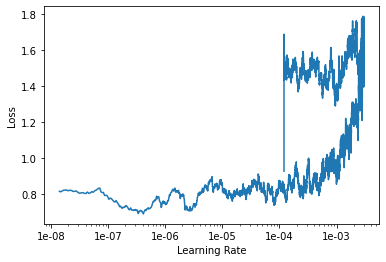

In [ ]:
learn.recorder.plot(1)

Drowzee


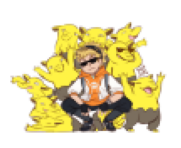

In [ ]:
import matplotlib.pyplot as plt
image2 = open_image("/content/dataset/train/Drowzee/Drowzee.105.png")
pred_class, pred_idx, pred_outputs = learn.predict(image2)
print(pred_class)
image2.show()

In [ ]:
learn.save("/content/drive/MyDrive/Pokemon")

In [ ]:
learn.export("/content/drive/MyDrive/Pokemon1.pth")